In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

In [18]:
# Read the file assuming it's complex floats (fc32)
# The path is modified to include the 'Bins/' directory
data = np.fromfile('Bins/capture_.dat', dtype=np.complex64)

# Print shape to confirm load (Optional, for verification)
print(f"Data shape: {data.shape}")

(246, 2048)
Total samples: 503808
Number of chunks: 246
First sample: (-0.12652970850467682+0.24491098523139954j)


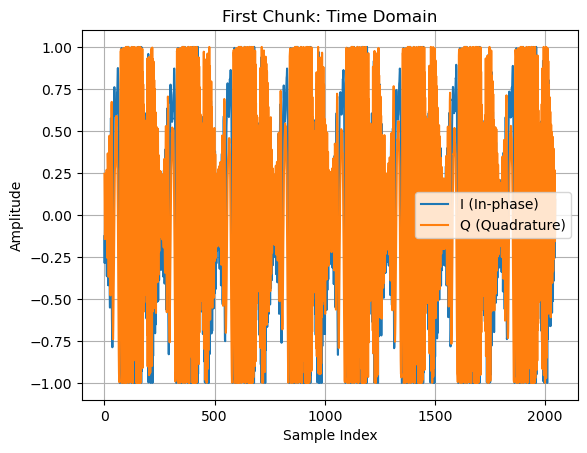

In [19]:
# Reshape into chunks (2048 samples per chunk)
chunks = data.reshape(-1, 2048)  # Shape: [num_chunks, 2048]
print(chunks.shape)

# Print basic info
print(f"Total samples: {len(data)}")
print(f"Number of chunks: {len(chunks)}")
print(f"First sample: {data[0]}")  # Print the first sample

# Plot one chunk
plt.figure()
plt.plot(np.real(chunks[0]), label="I (In-phase)")
plt.plot(np.imag(chunks[0]), label="Q (Quadrature)")
plt.title("First Chunk: Time Domain")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.show()

In [20]:
Fs = 20e6             # 25 MS/s
L = 256               # Zadoff-Chu length
ZC_REF = np.array([
    1.0+0.0j, 1.0000+0.0000j, 0.9997-0.0246j, 0.9973-0.0739j, 0.9891-0.1473j,
    0.9698-0.2439j, 0.9325-0.3612j, 0.8691-0.4947j, 0.7713-0.6365j, 0.6317-0.7752j,
    0.4457-0.8952j, 0.2139-0.9768j, -0.0554-0.9985j, -0.3439-0.9390j, -0.6221-0.7829j,
    -0.8502-0.5264j, -0.9830-0.1837j, -0.9781+0.2079j, -0.8090+0.5878j, -0.4785+0.8781j,
    -0.0308+0.9995j, 0.4457+0.8952j, 0.8302+0.5575j, 0.9988+0.0493j, 0.8691-0.4947j,
    0.4457-0.8952j, -0.1534-0.9882j, -0.7136-0.7005j, -0.9939-0.1107j, -0.8370+0.5472j,
    -0.2737+0.9618j, 0.4457+0.8952j, 0.9411+0.3382j, 0.9032-0.4291j, 0.3090-0.9511j,
    -0.5000-0.8660j, -0.9830-0.1837j, -0.7634+0.6459j, 0.0431+0.9991j, 0.8302+0.5575j,
    0.9325-0.3612j, 0.2139-0.9768j, -0.7136-0.7005j, -0.9667+0.2558j, -0.2499+0.9683j,
    0.7390+0.6737j, 0.9325-0.3612j, 0.0677-0.9977j, -0.8868-0.4622j, -0.7634+0.6459j,
    0.3324+0.9432j, 1.0000+0.0000j, 0.3090-0.9511j, -0.8233-0.5677j, -0.7634+0.6459j,
    0.4457+0.8952j, 0.9698-0.2439j, -0.0554-0.9985j, -0.9939-0.1107j, -0.2499+0.9683j,
    0.9325+0.3612j, 0.4457-0.8952j, -0.8629-0.5053j, -0.5421+0.8403j, 0.8302+0.5575j,
    0.5524-0.8336j, -0.8502-0.5264j, -0.4785+0.8781j, 0.9135+0.4067j, 0.3090-0.9511j,
    -0.9830-0.1837j, -0.0308+0.9995j, 0.9891-0.1473j, -0.3439-0.9390j, -0.8370+0.5472j,
    0.7390+0.6737j, 0.4457-0.8952j, -0.9872-0.1595j, 0.1656+0.9862j, 0.8691-0.4947j,
    -0.7791-0.6269j, -0.2737+0.9618j, 0.9891-0.1473j, -0.5626-0.8267j, -0.4785+0.8781j,
    1.0000+0.0000j, -0.5000-0.8660j, -0.4785+0.8781j, 0.9973-0.0739j, -0.6221-0.7829j,
    -0.2737+0.9618j, 0.9325-0.3612j, -0.8629-0.5053j, 0.1656+0.9862j, 0.6317-0.7752j,
    -0.9981+0.0616j, 0.7390+0.6737j, -0.0554-0.9985j, -0.6412+0.7674j, 0.9891-0.1473j,
    -0.8502-0.5264j, 0.3324+0.9432j, 0.3090-0.9511j, -0.8090+0.5878j, 0.9997-0.0246j,
    -0.8502-0.5264j, 0.4457+0.8952j, 0.0677-0.9977j, -0.5421+0.8403j, 0.8691-0.4947j,
    -0.9981+0.0616j, 0.9325+0.3612j, -0.7136-0.7005j, 0.4011+0.9160j, -0.0554-0.9985j,
    -0.2737+0.9618j, 0.5524-0.8336j, -0.7634+0.6459j, 0.9032-0.4291j, -0.9781+0.2079j,
    1.0000+0.0000j, -0.9830-0.1837j, 0.9411+0.3382j, -0.8868-0.4622j, 0.8302+0.5575j,
    -0.7791-0.6269j, 0.7390+0.6737j, -0.7136-0.7005j, 0.7049+0.7093j, -0.7136-0.7005j,
    0.7390+0.6737j, -0.7791-0.6269j, 0.8302+0.5575j, -0.8868-0.4622j, 0.9411+0.3382j,
    -0.9830-0.1837j, 1.0000+0.0000j, -0.9781+0.2079j, 0.9032-0.4291j, -0.7634+0.6459j,
    0.5524-0.8336j, -0.2737+0.9618j, -0.0554-0.9985j, 0.4011+0.9160j, -0.7136-0.7005j,
    0.9325+0.3612j, -0.9981+0.0616j, 0.8691-0.4947j, -0.5421+0.8403j, 0.0677-0.9977j,
    0.4457+0.8952j, -0.8502-0.5264j, 0.9997-0.0246j, -0.8090+0.5878j, 0.3090-0.9511j,
    0.3324+0.9432j, -0.8502-0.5264j, 0.9891-0.1473j, -0.6412+0.7674j, -0.0554-0.9985j,
    0.7390+0.6737j, -0.9981+0.0616j, 0.6317-0.7752j, 0.1656+0.9862j, -0.8629-0.5053j,
    0.9325-0.3612j, -0.2737+0.9618j, -0.6221-0.7829j, 0.9973-0.0739j, -0.4785+0.8781j,
    -0.5000-0.8660j, 1.0000+0.0000j, -0.4785+0.8781j, -0.5626-0.8267j, 0.9891-0.1473j,
    -0.2737+0.9618j, -0.7791-0.6269j, 0.8691-0.4947j, 0.1656+0.9862j, -0.9872-0.1595j,
    0.4457-0.8952j, 0.7390+0.6737j, -0.8370+0.5472j, -0.3439-0.9390j, 0.9891-0.1473j,
    -0.0308+0.9995j, -0.9830-0.1837j, 0.3090-0.9511j, 0.9135+0.4067j, -0.4785+0.8781j,
    -0.8502-0.5264j, 0.5524-0.8336j, 0.8302+0.5575j, -0.5421+0.8403j, -0.8629-0.5053j,
    0.4457-0.8952j, 0.9325+0.3612j, -0.2499+0.9683j, -0.9939-0.1107j, -0.0554-0.9985j,
    0.9698-0.2439j, 0.4457+0.8952j, -0.7634+0.6459j, -0.8233-0.5677j, 0.3090-0.9511j,
    1.0000+0.0000j, 0.3324+0.9432j, -0.7634+0.6459j, -0.8868-0.4622j, 0.0677-0.9977j,
    0.9325-0.3612j, 0.7390+0.6737j, -0.2499+0.9683j, -0.9667+0.2558j, -0.7136-0.7005j,
    0.2139-0.9768j, 0.9325-0.3612j, 0.8302+0.5575j, 0.0431+0.9991j, -0.7634+0.6459j,
    -0.9830-0.1837j, -0.5000-0.8660j, 0.3090-0.9511j, 0.9032-0.4291j, 0.9411+0.3382j,
    0.4457+0.8952j, -0.2737+0.9618j, -0.8370+0.5472j, -0.9939-0.1107j, -0.7136-0.7005j,
    -0.1534-0.9882j, 0.4457-0.8952j, 0.8691-0.4947j, 0.9988+0.0493j, 0.8302+0.5575j,
    0.4457+0.8952j, -0.0308+0.9995j, -0.4785+0.8781j, -0.8090+0.5878j, -0.9781+0.2079j,
    -0.9830-0.1837j, -0.8502-0.5264j, -0.6221-0.7829j, -0.3439-0.9390j, -0.0554-0.9985j,
    0.2139-0.9768j, 0.4457-0.8952j, 0.6317-0.7752j, 0.7713-0.6365j, 0.8691-0.4947j,
    0.9325-0.3612j, 0.9698-0.2439j, 0.9891-0.1473j, 0.9973-0.0739j, 0.9997-0.0246j,
    1.0000+0.0000j
], dtype=np.complex64)
ZC_FREQ = np.fft.fft(ZC_REF)


work_chunks = chunks[0:240]  # Take last 100

In [21]:
def find_first_path_idx(chunk, ref_seq, threshold_factor=4.0):
    search_len = min(len(chunk), 1024)
    corr = np.correlate(chunk[:search_len], ref_seq, mode='valid')
    corr_mag = np.abs(corr)
    
    noise_floor = np.mean(np.sort(corr_mag)[:len(corr_mag)//2])
    noise_std = np.std(np.sort(corr_mag)[:len(corr_mag)//2])
    threshold = noise_floor + (threshold_factor * noise_std)
    
    peak_idx = np.argmax(corr_mag)
    
    # Backwards search for leading edge
    search_back = 100
    start_search = max(0, peak_idx - search_back)
    window = corr_mag[start_search : peak_idx]
    below_thresh = np.where(window < threshold)[0]
    
    return (start_search + below_thresh[-1] + 1) if len(below_thresh) > 0 else peak_idx

In [22]:
def estimate_cfo_sro_chunk(symbols_data, ref_freq):
    """
    symbols_data: Array of shape (N_sym, 256) containing aligned symbols
    ref_freq: FFT of reference sequence
    """
    num_syms = len(symbols_data)
    if num_syms < 2: return 0, 0
    
    # --- CFO Estimation (Schmidl-Cox average) ---
    # Phase diff between adjacent symbols
    phase_diffs = []
    for i in range(num_syms - 1):
        # y[n] * y*[n+L]
        z = np.sum(symbols_data[i+1] * np.conj(symbols_data[i]))
        phase_diffs.append(np.angle(z))
    
    avg_phase = np.mean(phase_diffs)
    cfo_hz = (avg_phase * Fs) / (2 * np.pi * L)
    
    # --- SRO Estimation (Delay Drift) ---
    # Compare peak delay of first symbol vs last symbol
    # We use CIR for this
    
    # CIR of First Symbol
    H_first = np.fft.fft(symbols_data[0]) * np.conj(ref_freq)
    h_first = np.fft.ifft(H_first)
    peak_first = np.argmax(np.abs(h_first))
    
    # CIR of Last Symbol
    H_last = np.fft.fft(symbols_data[-1]) * np.conj(ref_freq)
    h_last = np.fft.ifft(H_last)
    peak_last = np.argmax(np.abs(h_last))
    
    # Unwrap shift
    diff = peak_last - peak_first
    if diff > L/2: diff -= L
    if diff < -L/2: diff += L
    
    # SRO = drift / time_elapsed
    # time_elapsed = (num_syms - 1) symbols
    samples_elapsed = (num_syms - 1) * L
    if samples_elapsed == 0:
        sro_ppm = 0
    else:
        sro_ppm = (diff / samples_elapsed) * 1e6
        
    return cfo_hz, sro_ppm

In [23]:
# ==========================================
# 3. PRE-LOOP: CALIBRATE CFO FROM 1ST CHUNK
# ==========================================
print("Calibrating CFO from the first valid chunk...")

global_cfo_hz = 0.0

# Find the first chunk that has enough data to estimate CFO
for chunk in work_chunks:
    # Sync roughly to find if we have a preamble
    idx = find_first_path_idx(chunk, ZC_REF)
    payload_start = idx + 256
    
    # We need at least 2 symbols (256*2) to estimate CFO
    if len(chunk) - payload_start >= 256 * 2:
        # Extract just enough to estimate
        temp_payload = chunk[payload_start : payload_start + 512] # 2 symbols
        temp_matrix = temp_payload.reshape(2, 256)
        
        # Estimate
        global_cfo_hz, _ = estimate_cfo_sro_chunk(temp_matrix, ZC_FREQ)
        break

print(f"Global CFO Estimate: {global_cfo_hz:.2f} Hz")

# Generate Correction Vector (Length 2048)
# Formula: e^(-j * 2 * pi * f_offset * t)
t_vec = np.arange(2048) / Fs
correction_vec = np.exp(-1j * 2 * np.pi * global_cfo_hz * t_vec)

# ==========================================
# 4. MAIN PROCESSING LOOP (WITH CORRECTION)
# ==========================================

accumulated_cir_mags = []
accumulated_cfr_mags = []
cfo_list = [] # This will now measure RESIDUAL CFO (should be ~0)
sro_list = []

print(f"Processing {len(work_chunks)} chunks with CFO correction...")

for i, chunk in enumerate(work_chunks):
    # --- STEP A: APPLY CORRECTION ---
    # Apply the de-rotation to the raw chunk immediately
    # We slice t_vec to match chunk length just in case chunk < 2048
    chunk_len = len(chunk)
    chunk_corrected = chunk * correction_vec[:chunk_len]
    
    # --- STEP B: SYNCHRONIZATION ---
    # Use the CORRECTED chunk to find the preamble
    preamble_idx = find_first_path_idx(chunk_corrected, ZC_REF)
    
    # --- STEP C: EXTRACT PAYLOAD ---
    payload_start = preamble_idx + 256
    
    remaining_samples = len(chunk_corrected) - payload_start
    num_full_symbols = remaining_samples // 256
    symbols_to_take = min(7, num_full_symbols)
    
    if symbols_to_take < 2:
        continue
        
    payload_samples = chunk_corrected[payload_start : payload_start + symbols_to_take*256]
    payload_matrix = payload_samples.reshape(symbols_to_take, 256)
    
    # --- STEP D: PROCESS SYMBOLS ---
    for sym_idx in range(symbols_to_take):
        sym_t = payload_matrix[sym_idx]
        
        # FFT
        sym_f = np.fft.fft(sym_t)
        
        # CFR (Freq Response)
        H_f = sym_f * np.conj(ZC_FREQ)
        accumulated_cfr_mags.append(np.abs(H_f))
        
        # CIR (Impulse Response)
        h_t = np.fft.ifft(H_f)
        accumulated_cir_mags.append(np.abs(h_t))
        
    # --- STEP E: VERIFY RESIDUAL OFFSETS ---
    # We estimate CFO again. Since we corrected it, this should be near 0.
    resid_cfo, chunk_sro = estimate_cfo_sro_chunk(payload_matrix, ZC_FREQ)
    cfo_list.append(resid_cfo)
    sro_list.append(chunk_sro)

print(f"Processing Complete.")
print(f"Average Residual CFO (should be near 0): {np.mean(cfo_list):.2f} Hz")

Calibrating CFO from the first valid chunk...
Global CFO Estimate: -91.40 Hz
Processing 240 chunks with CFO correction...
Processing Complete.
Average Residual CFO (should be near 0): 71.37 Hz



Analysis Complete.
Processed 1203 total symbols across 240 chunks.
Average CFO: 71.37 Hz
Average SRO: 0.00 ppm


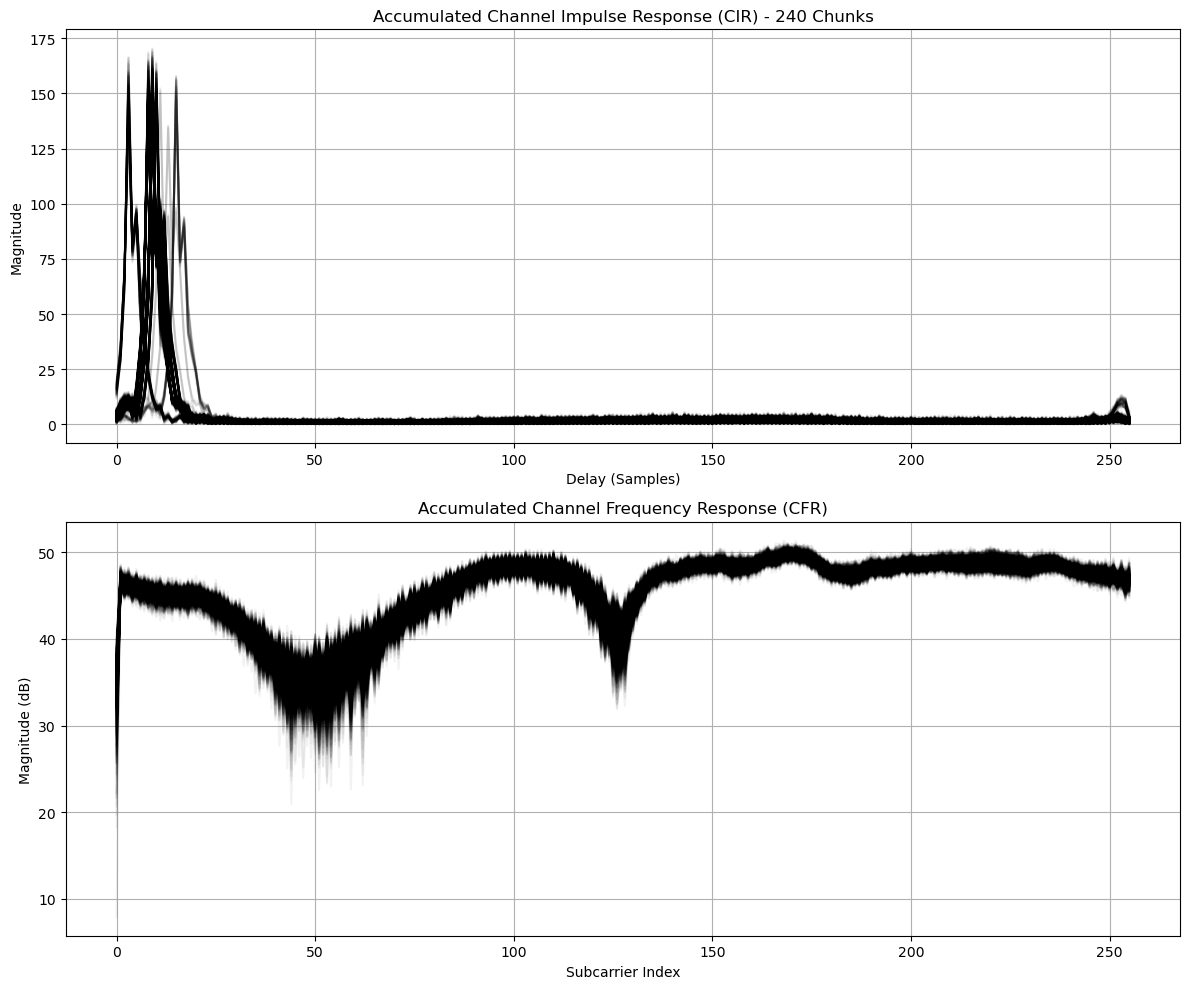

In [24]:
# ==========================================
# 4. PLOTTING & RESULTS
# ==========================================

print(f"\nAnalysis Complete.")
print(f"Processed {len(accumulated_cir_mags)} total symbols across {len(work_chunks)} chunks.")
print(f"Average CFO: {np.mean(cfo_list):.2f} Hz")
print(f"Average SRO: {np.mean(sro_list):.2f} ppm")

plt.figure(figsize=(12, 10))

# Plot 1: CIR (Time Domain)
plt.subplot(2, 1, 1)
# Plot all accumulated vectors
# Transpose to plot easily: plot() expects columns as series
# But simpler loop is safer for memory if massive, though 100*7=700 is small.
cir_array = np.array(accumulated_cir_mags).T # Shape (256, 700)
plt.plot(cir_array, color='black', alpha=0.05) # Alpha creates density effect
plt.title(f"Accumulated Channel Impulse Response (CIR) - {len(work_chunks)} Chunks")
plt.xlabel("Delay (Samples)")
plt.ylabel("Magnitude")
plt.grid(True)

# Plot 2: CFR (Frequency Domain)
plt.subplot(2, 1, 2)
cfr_array = np.array(accumulated_cfr_mags).T
cfr_db = 20*np.log10(cfr_array + 1e-12) # Add tiny epsilon for log
plt.plot(cfr_db, color='black', alpha=0.05)
plt.title(f"Accumulated Channel Frequency Response (CFR)")
plt.xlabel("Subcarrier Index")
plt.ylabel("Magnitude (dB)")
plt.grid(True)

plt.tight_layout()
plt.show()

6.770146484375
6.596166381835937
6.592520751953125
6.32632568359375
6.2349560546875
6.432686157226563
6.405277709960938
6.48941162109375
6.53143310546875
6.402030029296875
6.567396850585937
6.83288330078125
6.61364501953125
6.47022216796875
6.439428100585937
6.2275762939453125
6.068286743164062
6.387495727539062
6.220322265625001
6.2963427734375
6.616925659179688
6.74622314453125
6.264955444335937
6.191553344726563
6.245889282226563
6.202899169921875
6.131439819335938
6.284779663085938
6.1143896484375
6.252640991210938
6.55883056640625
6.486467895507813
6.437059936523438
6.390138549804687
6.336262817382813
6.250416259765625
6.1483398437500005
6.17259521484375
6.30591796875
6.2340460205078125
6.416494140625
6.265960083007813
6.662351684570313
6.529459838867187
6.4595141601562505
6.2538824462890625
6.261204223632813
6.112396850585938
6.132807006835938
6.3727044677734375
6.459661254882812
6.5645080566406255
6.644552612304688
6.3865673828125
6.2499414062500005
6.420485229492187
6.254629516

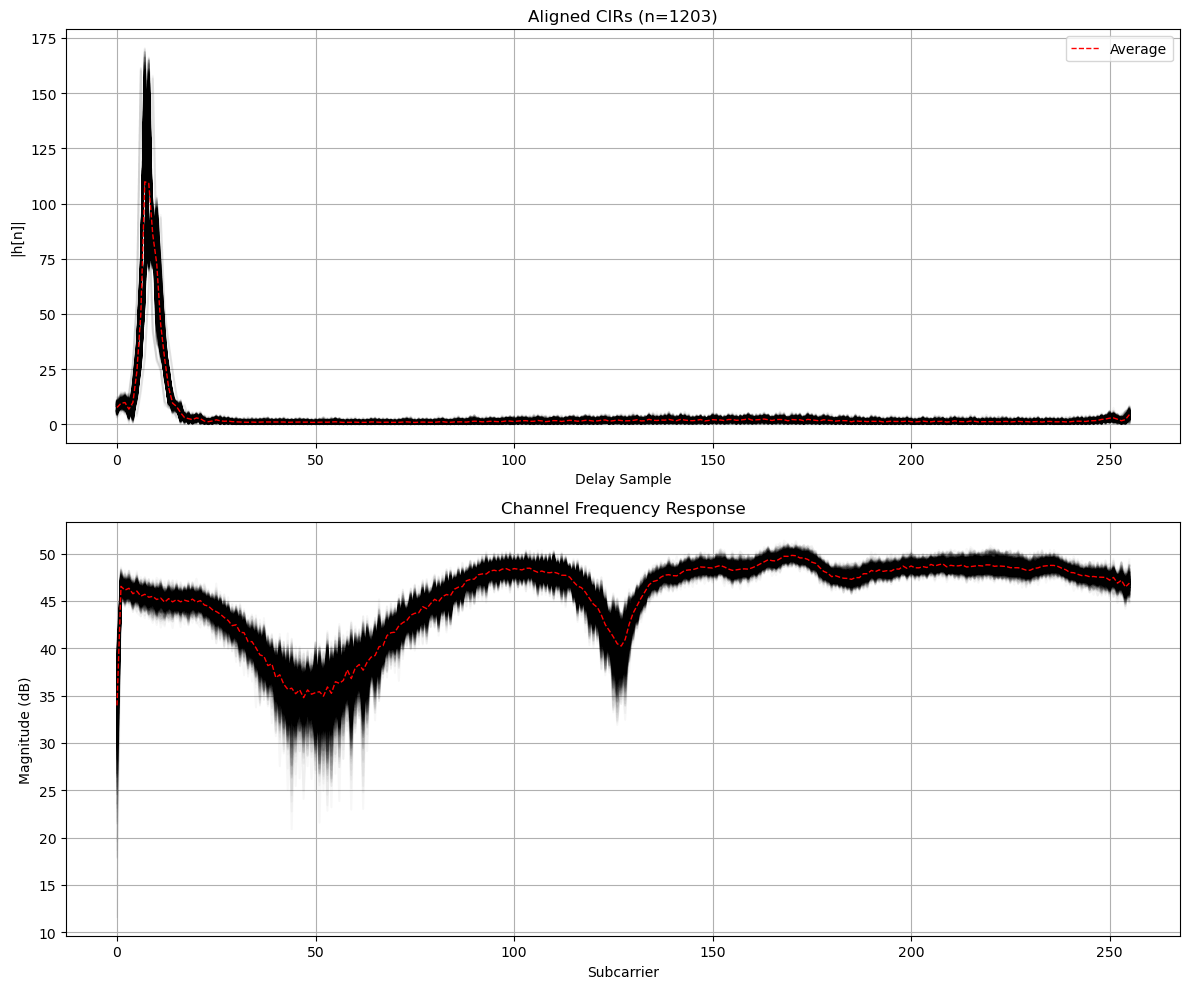

In [29]:
# 2. IMPROVED SYNCHRONIZER
def robust_synchronizer(chunk, ref_seq, sigma_factor=15.0, max_delay_window=100):
    """
    Finds the first arriving path within a constrained window of the strongest path.
    Rejects outliers based on PAPR.
    """
    # 1. Standard Cross-Correlation
    corr = np.correlate(chunk[:1024], ref_seq, mode='valid')
    corr_mag = np.abs(corr)
    
    # 2. Outlier Check: PAPR (Peak-to-Average Power Ratio)
    # If the peak isn't significantly higher than average, it's likely just noise.
    peak_val = np.max(corr_mag)
    avg_val = np.mean(corr_mag)
    papr = peak_val / (avg_val + 1e-9)
    #print(papr)
    
    # Threshold for a "valid" correlation peak (e.g., must be 5x stronger than average)
    if papr < 5.0:
        return None, None # Reject chunk
        
    # 3. Find Strongest Peak (Main Multipath)
    strongest_idx = np.argmax(corr_mag)
    
    # 4. Define Search Window (Look back 'max_delay_window' samples)
    # We only trust peaks that are physically close to the strongest reflection
    start_search = max(0, strongest_idx - max_delay_window)
    window_data = corr_mag[start_search : strongest_idx]
    
    # 5. Define Dynamic Threshold
    # Noise floor estimated from the QUIETEST part of the correlation (lower 25%)
    noise_floor_est = np.mean(np.sort(corr_mag)[:len(corr_mag)//4])
    noise_std = np.std(np.sort(corr_mag)[:len(corr_mag)//4])
    
    # Threshold 1: Statistical (e.g. 4 sigma above noise)
    thresh_stat = noise_floor_est + (sigma_factor * noise_std)
    #print(thresh_stat)
    
    # Threshold 2: Relative (e.g. 10% of the max peak)
    # This prevents locking onto small noise if SNR is high
    thresh_rel = 0.04 * peak_val
    
    final_thresh = max(thresh_stat, thresh_rel)
    print(final_thresh)
    #final_thresh = max(thresh_stat)
    
    # 6. Find First Path
    # Find all points in window ABOVE threshold
    # The 'first' path is the first index in this window that exceeds threshold
    valid_points = np.where(window_data > final_thresh)[0]
    
    if len(valid_points) > 0:
        # The first point in the window that crosses threshold
        first_path_idx = start_search + valid_points[0]
    else:
        # If nothing in the window crosses threshold (rare), assume Peak is LOS
        first_path_idx = strongest_idx
        
    return first_path_idx, papr

# ==========================================
# 3. MAIN LOOP WITH OUTLIER REJECTION
# ==========================================

# First, calibrate CFO using the "Best" chunk (highest PAPR)
best_papr = 0
global_cfo = 0

for chunk in work_chunks:
    # Just checking signal quality
    _, papr = robust_synchronizer(chunk, ZC_REF)
    if papr and papr > best_papr:
        # Estimate CFO on this high-quality chunk
        # (Using simple sync for estimation step)
        simple_idx = np.argmax(np.abs(np.correlate(chunk[:1024], ZC_REF, mode='valid')))
        payload = chunk[simple_idx+256 : simple_idx+256+512].reshape(2, 256)
        
        # Schmidl-Cox
        z = np.sum(payload[1] * np.conj(payload[0]))
        cfo_hz = (np.angle(z) * Fs) / (2 * np.pi * L)
        
        global_cfo = cfo_hz
        best_papr = papr

print(f"Global CFO Estimate: {global_cfo:.2f} Hz (from chunk with PAPR {best_papr:.1f})")

# Correction Vector
t_vec = np.arange(2048) / Fs
corr_vec = np.exp(-1j * 2 * np.pi * global_cfo * t_vec)

# Storage
valid_cir_mags = []
valid_cfr_mags = []
rejected_count = 0

for i, chunk in enumerate(work_chunks):
    # 1. Correct CFO
    chunk_corr = chunk * corr_vec[:len(chunk)]
    
    # 2. Robust Sync
    start_idx, papr = robust_synchronizer(chunk_corr, ZC_REF)
    
    if start_idx is None:
        rejected_count += 1
        continue # Skip this chunk
        
    # 3. Extract Payload
    payload_start = start_idx + 256
    remaining = len(chunk_corr) - payload_start
    n_syms = min(7, remaining // 256)
    
    if n_syms < 1:
        rejected_count += 1
        continue
        
    payload = chunk_corr[payload_start : payload_start + n_syms*256].reshape(n_syms, 256)
    
    # 4. Accumulate Metrics
    for sym in payload:
        sym_f = np.fft.fft(sym)
        H_f = sym_f * np.conj(ZC_FREQ)
        h_t = np.fft.ifft(H_f)
        
        valid_cfr_mags.append(np.abs(H_f))
        valid_cir_mags.append(np.abs(h_t))

# ==========================================
# 4. PLOTTING
# ==========================================
print(f"Processed {len(work_chunks)} chunks.")
print(f"Rejected {rejected_count} chunks as outliers/noise.")
print(f"Valid Symbols: {len(valid_cir_mags)}")

plt.figure(figsize=(12, 10))

# Plot 1: Robust CIR Overlay 
plt.subplot(2, 1, 1)
if valid_cir_mags:
    cir_arr = np.array(valid_cir_mags).T
    plt.plot(cir_arr, color='black', alpha=0.03) # High transparency shows density
    
    # Plot Average in Red
    plt.plot(np.mean(cir_arr, axis=1), color='red', linewidth=1, linestyle='--', label='Average')
    plt.legend()

plt.title(f"Aligned CIRs (n={len(valid_cir_mags)})")
plt.xlabel("Delay Sample")
plt.ylabel("|h[n]|")
plt.grid(True)

# Plot 2: Robust CFR 
plt.subplot(2, 1, 2)
if valid_cfr_mags:
    cfr_arr = 20*np.log10(np.array(valid_cfr_mags).T + 1e-12)
    plt.plot(cfr_arr, color='black', alpha=0.03)
    plt.plot(np.mean(cfr_arr, axis=1), color='red', linewidth=1, linestyle='--')

plt.title("Channel Frequency Response")
plt.xlabel("Subcarrier")
plt.ylabel("Magnitude (dB)")
plt.grid(True)

plt.tight_layout()
plt.show()